In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/africa-economic-banking-and-systemic-crisis-data/african_crises.csv


In [2]:
#Number manipulation
import numpy as np

#Data Manipulation
import pandas as pd

#Plotting Libraries
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
##Some configuration settings
%matplotlib inline
pd.set_option("display.max_columns", 100)

In [4]:
#import the data
df = pd.read_csv("../input/africa-economic-banking-and-systemic-crisis-data/african_crises.csv", index_col = 0)
df.head()

,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
case,,,,,,,,,,,,,
1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [5]:
# feature evaluation, how many numeric how many discrete
df.dtypes


cc3                                 object
country                             object
year                                 int64
systemic_crisis                      int64
exch_usd                           float64
domestic_debt_in_default             int64
sovereign_external_debt_default      int64
gdp_weighted_default               float64
inflation_annual_cpi               float64
independence                         int64
currency_crises                      int64
inflation_crises                     int64
banking_crisis                      object
dtype: object

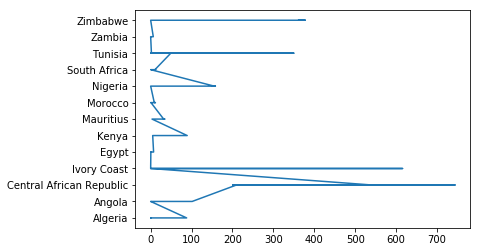

In [6]:
plt.plot(df['exch_usd'],df['country'])


In [7]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [8]:
print(df.shape)

(1059, 13)


In [9]:
print(list(df.columns))

['cc3', 'country', 'year', 'systemic_crisis', 'exch_usd', 'domestic_debt_in_default', 'sovereign_external_debt_default', 'gdp_weighted_default', 'inflation_annual_cpi', 'independence', 'currency_crises', 'inflation_crises', 'banking_crisis']


In [10]:
df['banking_crisis'].value_counts()

no_crisis    965
crisis        94
Name: banking_crisis, dtype: int64

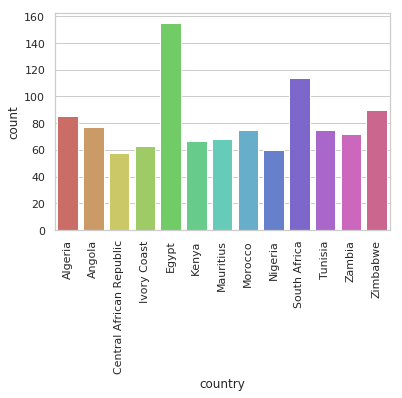

In [11]:
# total number of cases by country
sns.countplot(x='country', data=df, palette ='hls')
plt.xticks(rotation=90)
plt.show()

In [12]:
# Drop the categorical variables which are not useful to the dataset for logistic regression
df = df.drop(['cc3', 'country', 'year'], axis =1)
df.head()

,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
case,,,,,,,,,,
1,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
1,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
1,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
1,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


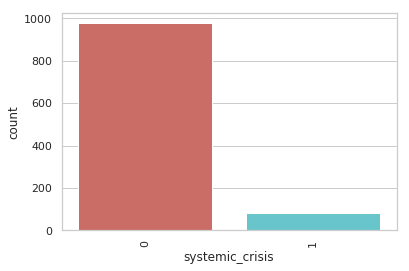

In [13]:
# check systemic_crisis
sns.countplot(x='systemic_crisis', data=df, palette ='hls')
plt.xticks(rotation=90)
plt.show()

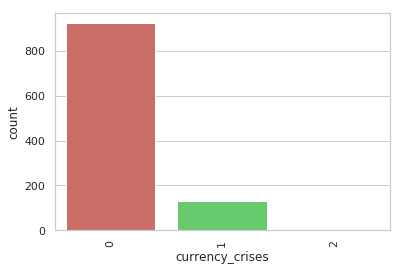

In [14]:
sns.countplot(x='currency_crises', data=df, palette ='hls')
plt.xticks(rotation=90)
plt.show()

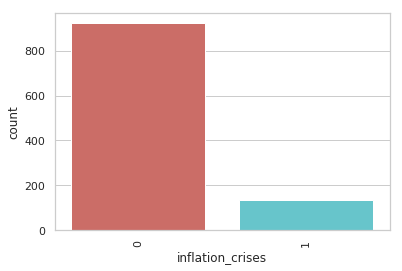

In [15]:
sns.countplot(x='inflation_crises', data=df, palette ='hls')
plt.xticks(rotation=90)
plt.show()

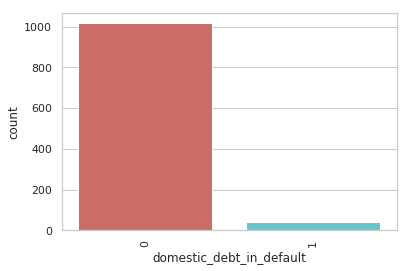

In [16]:
sns.countplot(x='domestic_debt_in_default', data=df, palette ='hls')
plt.xticks(rotation=90)
plt.show()

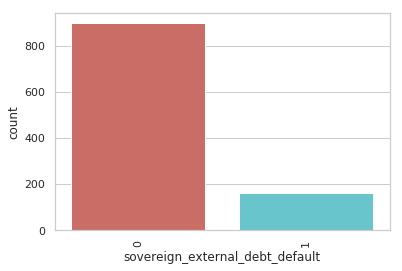

In [17]:
sns.countplot(x='sovereign_external_debt_default', data=df, palette ='hls')
plt.xticks(rotation=90)
plt.show()

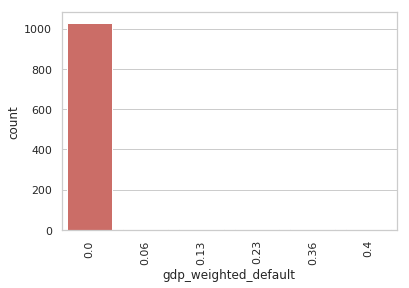

In [18]:
sns.countplot(x='gdp_weighted_default', data=df, palette ='hls')
plt.xticks(rotation=90)
plt.show()

In [19]:
# drop this column since it is not informative
df = df.drop(['gdp_weighted_default'], axis =1)
df.head()

,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
case,,,,,,,,,
1,1,0.052264,0,0,3.441456,0,0,0,crisis
1,0,0.052798,0,0,14.149140,0,0,0,no_crisis
1,0,0.052274,0,0,-3.718593,0,0,0,no_crisis
1,0,0.051680,0,0,11.203897,0,0,0,no_crisis
1,0,0.051308,0,0,-3.848561,0,0,0,no_crisis


In [20]:
y = df[['banking_crisis']]
y = pd.get_dummies(df['banking_crisis'],drop_first=True)
y

,no_crisis
case,
1,0
1,1
1,1
1,1
1,1
...,...
70,0
70,1
70,1


In [21]:
# drop y column from the original dataframe
df = df.drop(['banking_crisis'], axis =1)
df.head()

,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
case,,,,,,,,
1,1,0.052264,0,0,3.441456,0,0,0
1,0,0.052798,0,0,14.149140,0,0,0
1,0,0.052274,0,0,-3.718593,0,0,0
1,0,0.051680,0,0,11.203897,0,0,0
1,0,0.051308,0,0,-3.848561,0,0,0


In [22]:
# split the data into test train sets
from sklearn.model_selection import train_test_split
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(847, 8) (847, 1)
(212, 8) (212, 1)


In [23]:
y_test.head()

,no_crisis
case,
70,1
69,1
2,1
56,1
19,1


In [24]:
# fit a model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
#predictions
Predictions = logmodel.predict(X_test)

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,Predictions))

              precision    recall  f1-score   support

           0       0.80      0.18      0.30        22
           1       0.91      0.99      0.95       190

    accuracy                           0.91       212
   macro avg       0.86      0.59      0.62       212
weighted avg       0.90      0.91      0.88       212



In [27]:
# confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, Predictions))

[[  4  18]
 [  1 189]]


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,Predictions))

              precision    recall  f1-score   support

           0       0.80      0.18      0.30        22
           1       0.91      0.99      0.95       190

    accuracy                           0.91       212
   macro avg       0.86      0.59      0.62       212
weighted avg       0.90      0.91      0.88       212



In [29]:
# calculate the fpr and tpr for all thresholds of the classification
import sklearn.metrics as metrics
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

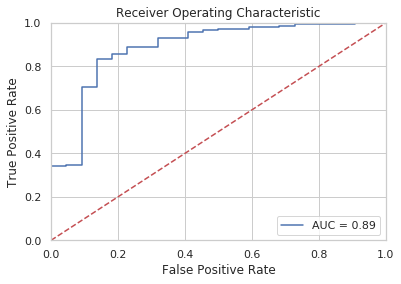

In [30]:
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()